In [31]:
from XTSTree.XTSTreePageHinkley import XTSTreePageHinkley
from segmentation_algorithms.topdown import XTSTreeTopDown
from segmentation_algorithms.topdown_artigo import XTSTreeTopDown2
from plot import plot
import random
import numpy as np
import pandas as pd

Example Series

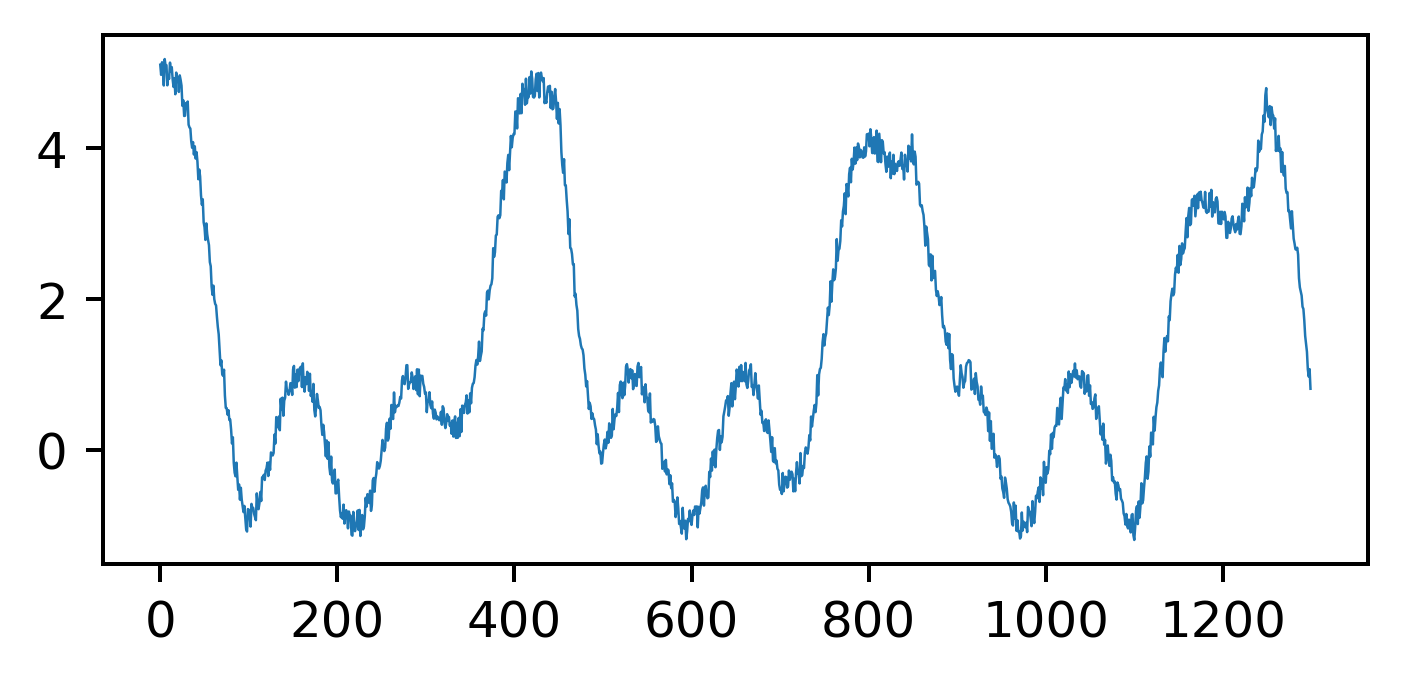

In [48]:
generator = np.random.default_rng(42)

series = np.concatenate([
  np.array(generator.uniform(-0.2, 0.2, 100)) + np.linspace(0, 5, 100)[::-1],
  
  np.array(generator.uniform(-0.2, 0.2, 200)),
  np.array(generator.uniform(-0.2, 0.2, 150)) + np.linspace(0, 5, 150),
  np.array(generator.uniform(-0.2, 0.2, 50)) + np.linspace(0, 5, 50)[::-1],

  np.array(generator.uniform(-0.2, 0.2, 200)),
  np.array(generator.uniform(-0.2, 0.2, 150)) + np.linspace(0, 5, 150),
  np.array(generator.uniform(-0.2, 0.2, 50)) + np.linspace(0, 5, 50)[::-1],

  np.array(generator.uniform(-0.2, 0.2, 200)),
  np.array(generator.uniform(-0.2, 0.2, 150)) + np.linspace(0, 5, 150),
  np.array(generator.uniform(-0.2, 0.2, 50)) + np.linspace(0, 5, 50)[::-1],
])
series = series + np.sin([i/20 for i in range(len(series))])
series = series
plot(series,
    # show_axis=(False, False), frame=False, save=True, img_name='./imagens_quali/serie_toy.jpeg'
  )

Não achei só um corte, escolhendo corte que gera maior pontuação, 881, 329.8689022092168, 2, 2


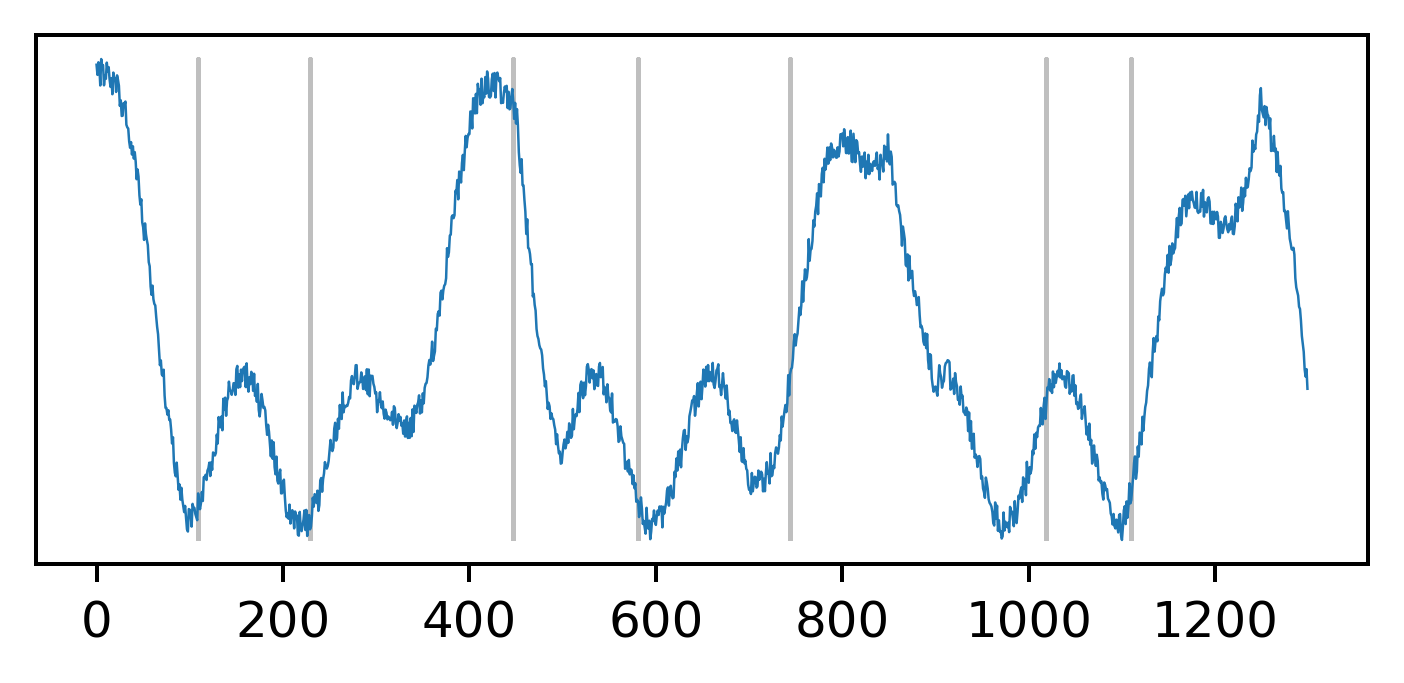

In [49]:
xtstree = XTSTreePageHinkley(
  # Stopping condition, adf is the AdFuller test, and stop_val increases the threshold for a series to be non-stationary. The bigger stop_val gets, the harder it is for a cut to be made
  stop_condition='adf',
  stop_val=0,
  # Max iterations during the binary search before it decides between the cuts found
  max_iter=100,
  # Minimum distance between cuts so multiple cuts aren't created close to drastic changing points
  min_dist=int(len(series)/100),
  # Page-Hinkley parameters
	min_instances=30,
	delta=0.005,
	alpha=1 - 0.0001,
	# Starting value for Page-Hinkley threshold before binary search is used
	starting_threshold=50.0,
)
# Creates the splits based on the series
xtstree = xtstree.create_splits(series)

# Gets a list of the cut positions for the series
cuts = xtstree.cut_points()

plot(series, divisions=cuts, show_axis=(True, False))

In [50]:
cbd

{0: [229], 1: [109, 1110], 2: [1018], 3: [744], 4: [447], 5: [581]}

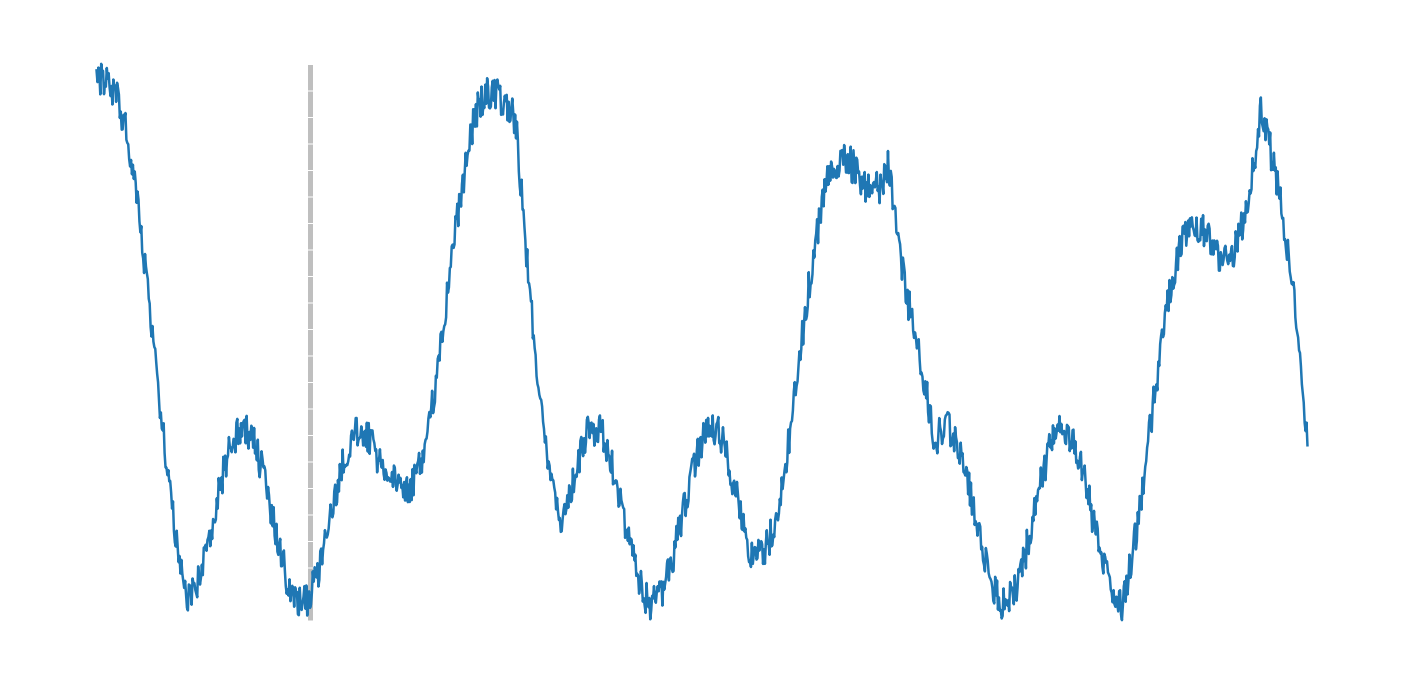

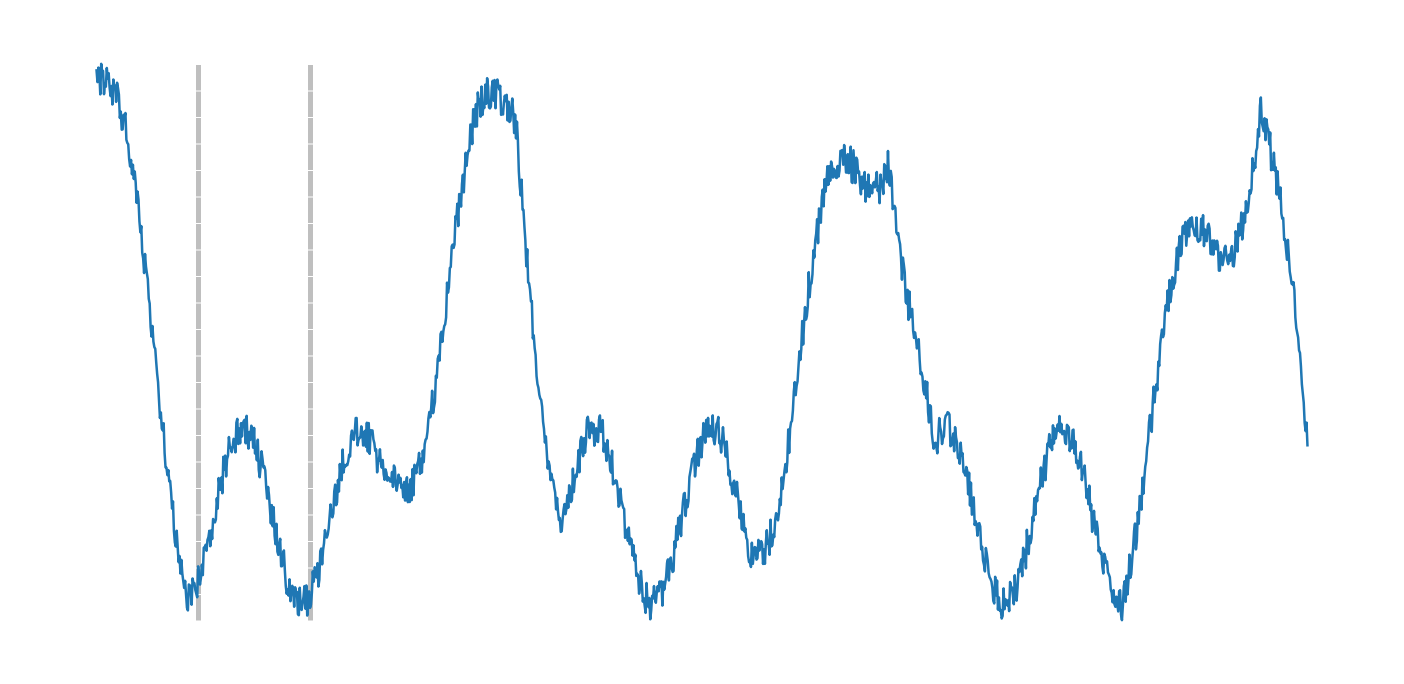

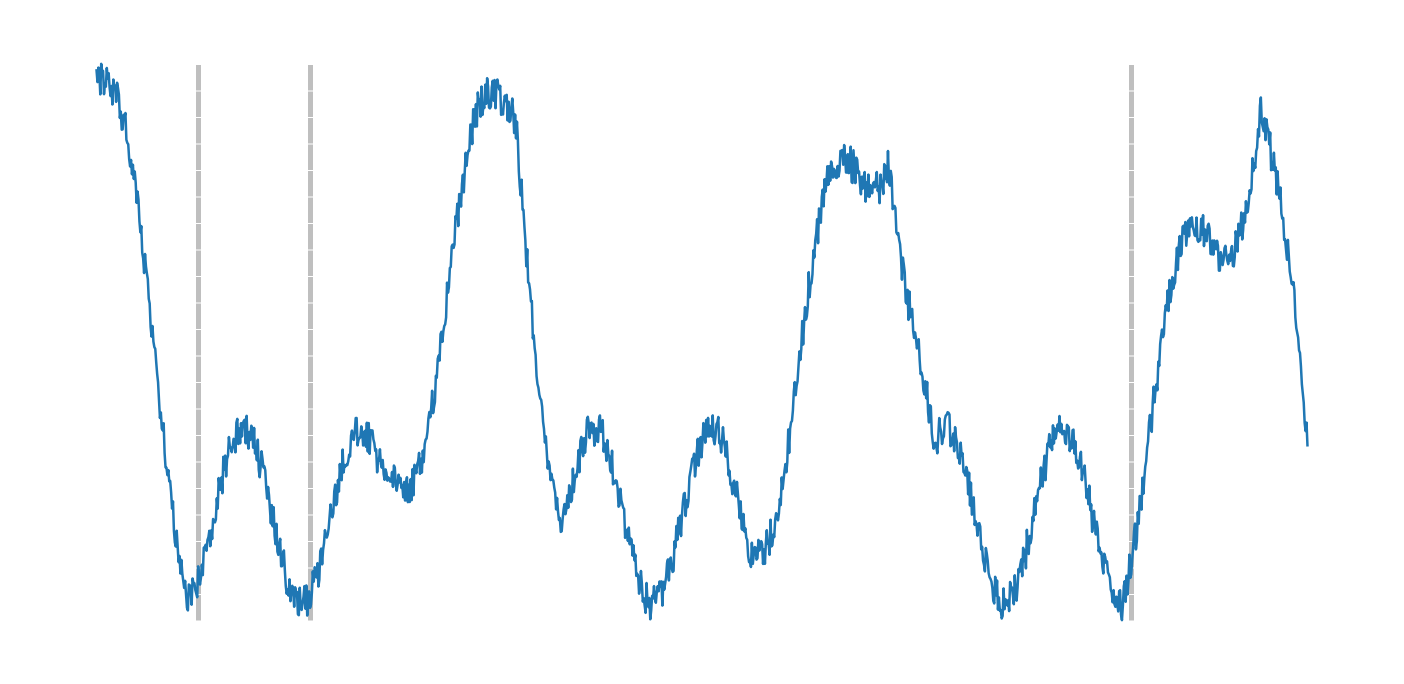

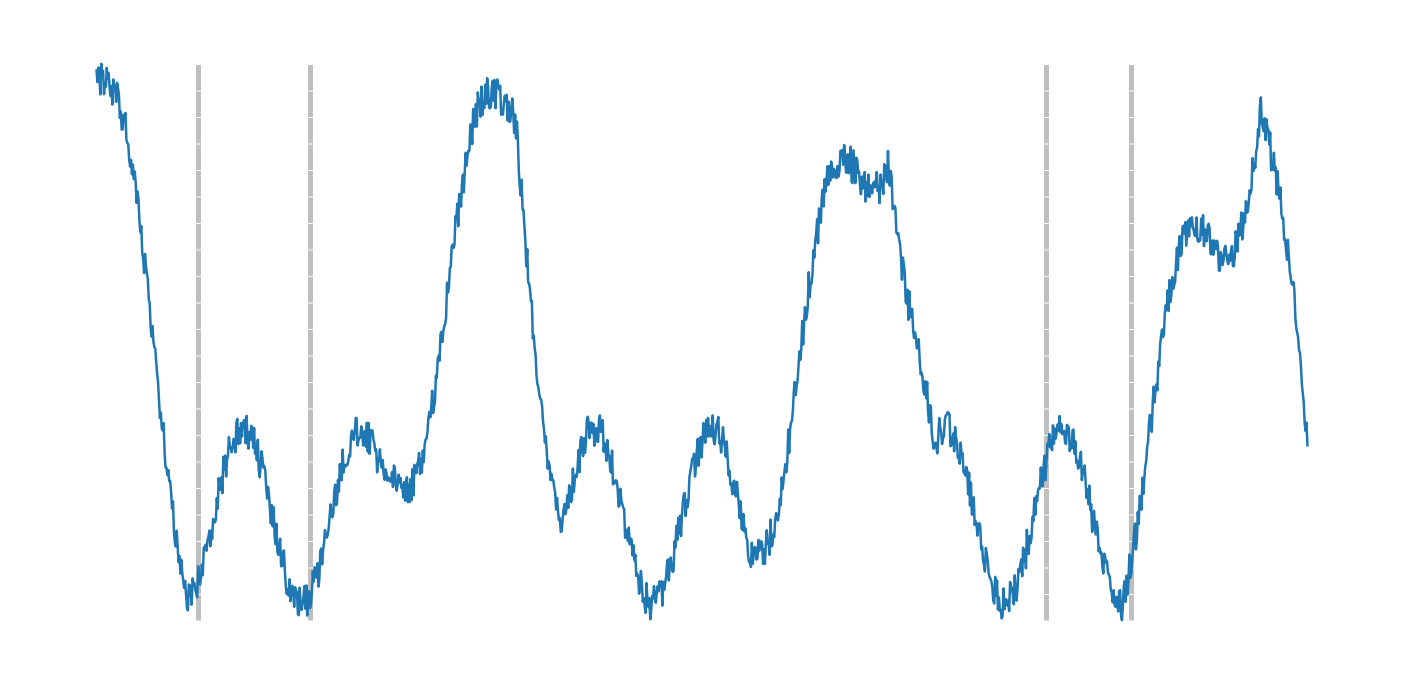

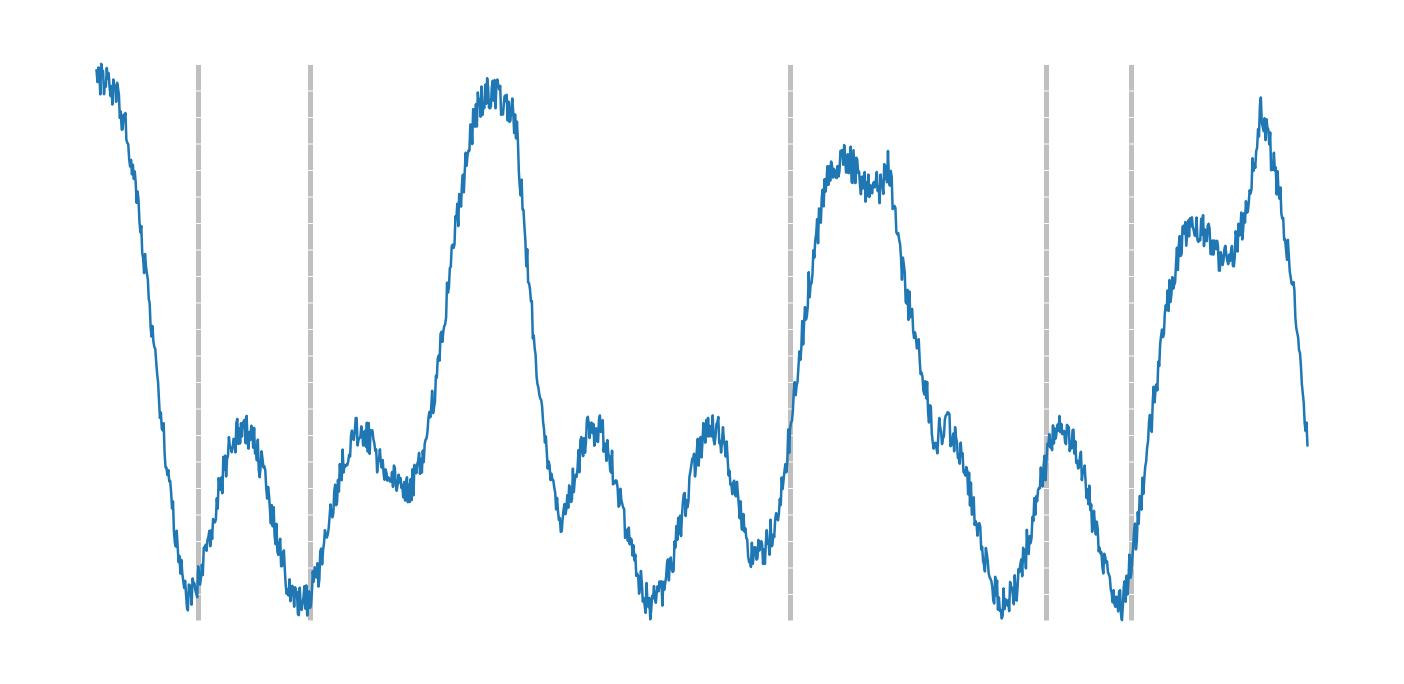

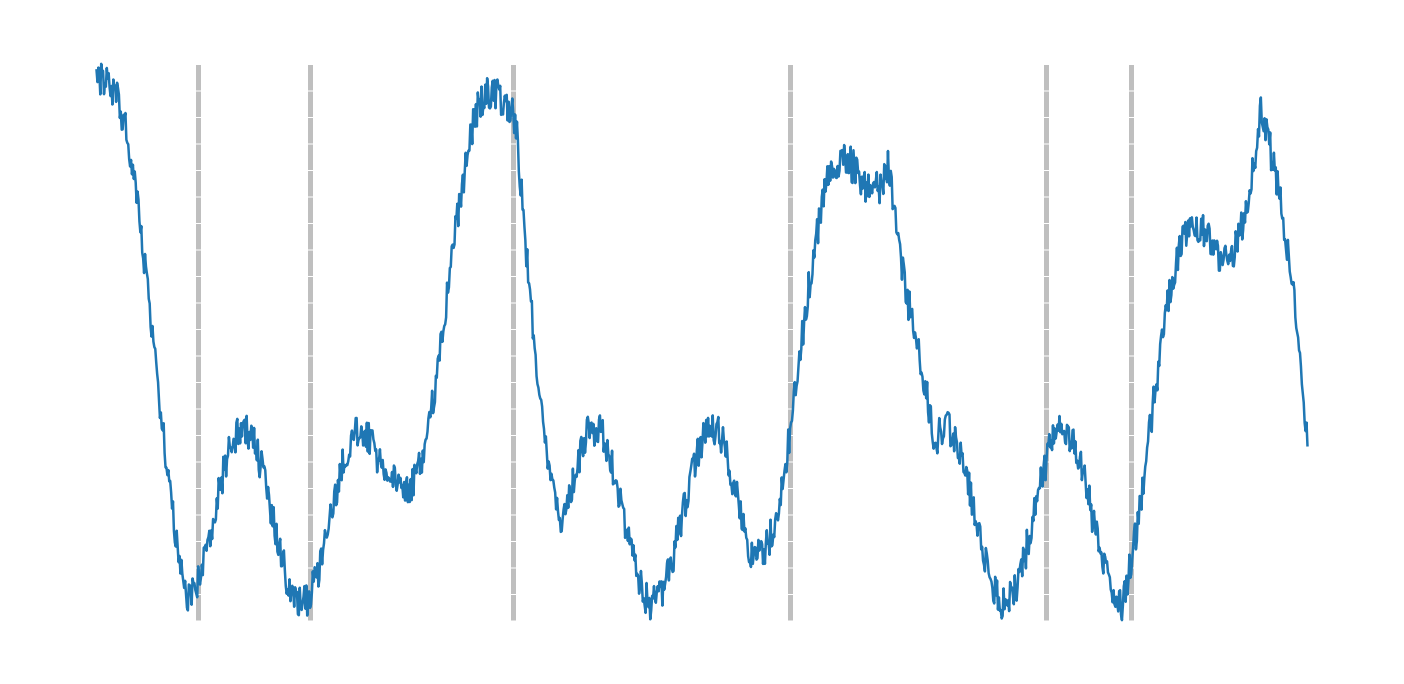

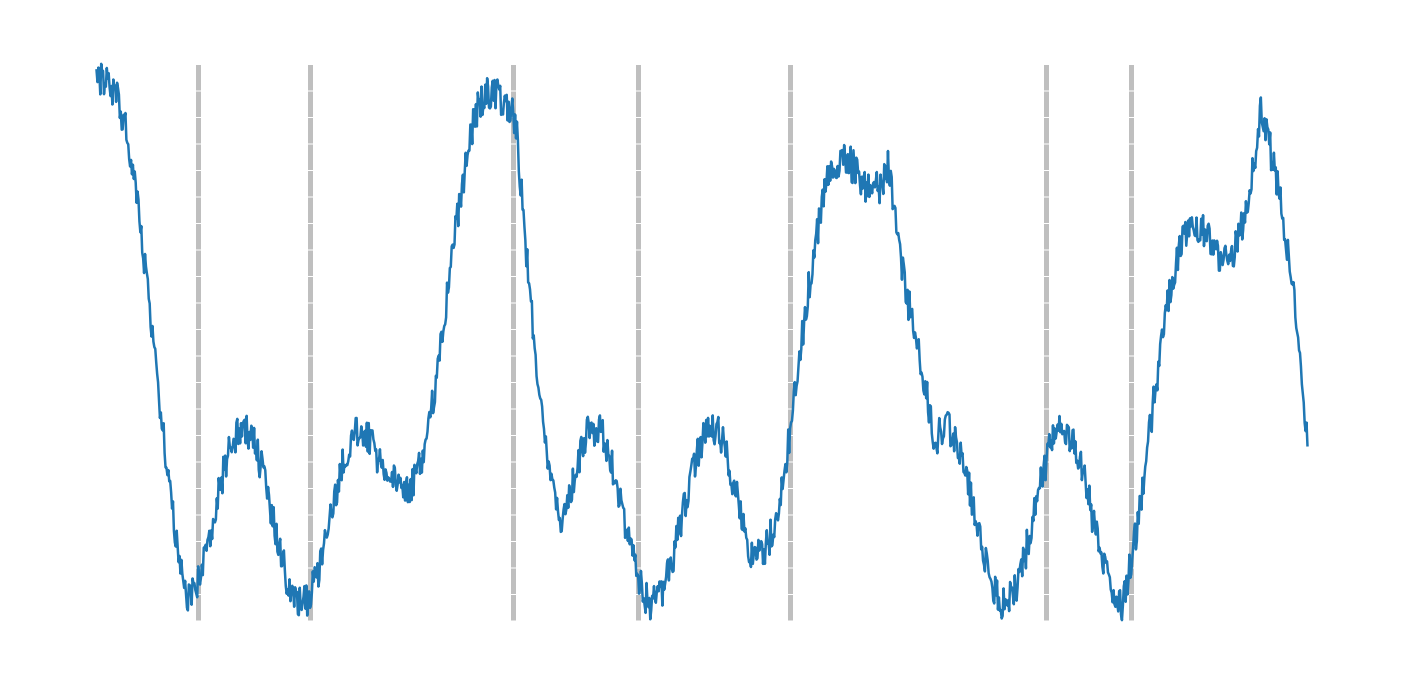

In [30]:
divs = []
i = 0
for cuts in cbd.values():
  for cut in cuts:
    divs.append(cut)
    plot(series, divisions=divs, show_axis=(False, False), frame=False, save=True, img_name=f'./imagens_quali/proposta/corte_{i}.jpeg')
    i+=1


Creating XTSTree

In [ ]:
xtstree = XTSTreePageHinkley(
  # Stopping condition, adf is the AdFuller test, and stop_val increases the threshold for a series to be non-stationary. The bigger stop_val gets, the harder it is for a cut to be made
  stop_condition='adf',
  stop_val=0.5,
  # Max iterations during the binary search before it decides between the cuts found
  max_iter=100,
  # Minimum distance between cuts so multiple cuts aren't created close to drastic changing points
  min_dist=0,
)

xtstree2 = XTSTreeTopDown2(
  # Stopping condition, adf is the AdFuller test, and stop_val increases the threshold for a series to be non-stationary. The bigger stop_val gets, the harder it is for a cut to be made
  stop_condition='lr_error',
  stop_val=0.5,
  # Max iterations during the binary search before it decides between the cuts found
  max_iter=100,
  # Minimum distance between cuts so multiple cuts aren't created close to drastic changing points
  min_dist=0,
)

Creating cuts for the series

In [ ]:
# Creates the splits based on the series
xtstree = xtstree.create_splits(series)

# Gets a list of the cut positions for the series
cuts = xtstree.cut_points()

plot(series, divisions=cuts, show_axis=(True, False))

In [ ]:
# Creates the splits based on the series
xtstree2 = xtstree2.create_splits(series[100:])

# Gets a list of the cut positions for the series
cuts = xtstree2.cut_points()

plot(series, divisions=cuts, show_axis=(True, False))

Plotting cuts labelled by depth

In [ ]:
labels = []
for depth, d_cuts in xtstree.get_cuts_by_depth().items():
  for cut in d_cuts:
    labels.append({'x': cut, 'label': depth})

plot(series, divisions=cuts, show_axis=(True, False), labels=labels)

Iterating through series' cuts

In [ ]:
for start, finish in zip([0, *cuts], [*cuts, len(series)]):
  print(len(series[start:finish]))
	# plot(series[start:finish], show_axis=(True, False))

Tree's heatmap

In [ ]:
# The XTSTree stores a heatmap indicating how close the tree is to a cut
# When it hits 0, the cutting process starts

plot(xtstree.get_heatmap())

In [ ]:
plot(series, color_gradient=xtstree.get_heatmap(), divisions=cuts)

Summary containing all cuts made by the XTSTree, divided by depth and with unique identifiers

In [ ]:
xtstree.summary()

Returns segments from the series using only cuts from a specified depth

In [ ]:
depth = 1
series_by_depth = xtstree.cut_series_by_depth(series)[depth]
for s in series_by_depth:
	plot(s)

Other series

In [ ]:
def formula1(x):
  if x <= -2:
    return 1
  elif x <= 0:
    return -1
  elif x <= 2:
    return 2
  else:
    return 1
  
def formula2(x):
  if x <= -2:
    return 1
  elif x <= 0:
    return -(x + 1)
  elif x <= 2:
    return x-1
  else:
    return 1

def formula3(x):
  if x <= 0:
    return 1
  else:
    return np.square(x)
  
def formula4(x):
  if x <= 1:
    return x
  else:
    return np.square(x)
  
def formula5(x):
  if x < -0.4:
    return pow(x, 5) - 2*pow(x, 3) + x
  elif x < 0:
    return pow(x, 4) + pow(x, 3) + pow(x, 2) + x
  else:
    return pow(x, 6) - 2*pow(x, 4) + pow(x, 2)
  
def formula6(x):
  if x <= (-2*np.pi)/3:
    return 3*np.sin(2*x+1)
  elif x <= (2*np.pi)/3:
    return np.sin(2*x+1)
  else:
    return 2*np.sin(1.5*x+3)
    

In [ ]:
ts1 = [formula1(x) for x in np.linspace(-4,4, num=5000)]
ts2 = [formula2(x) for x in np.linspace(-4,4, num=5000)]
ts3 = [formula3(x) for x in np.linspace(-1,1, num=5000)]
ts4 = [formula4(x) for x in np.linspace(-1,2, num=5000)]
ts5 = [formula5(x) for x in np.linspace(-1,1, num=5000)]
ts6 = [formula6(x) for x in np.linspace(-6,6, num=5000)]
plot(ts1), plot(ts2), plot(ts3), plot(ts4), plot(ts5), plot(ts6)

In [ ]:
def apply_xtstree(series, stop_condition='depth', stop_val=3, max_iter=100, min_instances=15, delta=0.005, alpha=1 - 0.0001, starting_threshold=50.0):
	xts = XTSTreePageHinkley(stop_condition=stop_condition, stop_val=stop_val, max_iter=max_iter, min_instances=min_instances, delta=delta, alpha=alpha, starting_threshold=starting_threshold)

	# Creates the splits based on the series
	xts = xts.create_splits(series)

	# Gets a list of the cut positions for the series
	cuts = xts.cut_points()

	plot(series, divisions=cuts, show_axis=(True, False))
	return xts

In [ ]:
from river.drift import PageHinkley

def apply_ph(series, min_instances, delta, threshold):
  cut_pos = []
  heatmap_increase = []
  heatmap_decrease = []
  ph = PageHinkley(min_instances=min_instances, delta=delta, threshold=threshold)
  # Rever funcionamento do min_dist junto dos heatmaps
  for i, val in enumerate(series):
    ph.update(val)
    if ph.drift_detected:
      cut_pos.append(i)
  plot(series, title=len(cut_pos), divisions=cut_pos, show_axis=(True, False))
  return cut_pos

def apply_ph_auto(series, min_instances, delta):
  for threshold in range(1,500,1):
    cut_pos = []
    heatmap_increase = []
    heatmap_decrease = []
    ph = PageHinkley(min_instances=min_instances, delta=delta, threshold=threshold)
    # Rever funcionamento do min_dist junto dos heatmaps
    for i, val in enumerate(series):
      ph.update(val)
      heatmap_increase.append(threshold - (ph._sum_increase - ph._min_increase))
      heatmap_decrease.append(threshold - (ph._sum_increase - ph._min_increase))
      if ph.drift_detected:
        cut_pos.append(i)
    if len(cut_pos) == 1:
      break
  plot(series, title=len(cut_pos), divisions=cut_pos, show_axis=(True, False), color_gradient=heatmap_increase)
  plot(series, title=len(cut_pos), divisions=cut_pos, show_axis=(True, False), color_gradient=heatmap_decrease)
  return cut_pos

In [ ]:
# print(apply_ph(ts1, min_instances=10, delta=0.005, threshold=1))
# print(apply_ph(ts2, min_instances=10, delta=0.8, threshold=10))
# print(apply_ph(ts3, min_instances=10, delta=0.8, threshold=1))
# print(apply_ph(ts4, min_instances=10, delta=0.05, threshold=5))
# print(apply_ph(ts5, min_instances=10, delta=0.005, threshold=50))
print(apply_ph(ts6, min_instances=10, delta=0.005, threshold=500))

In [ ]:
from pysr import PySRRegressor
def get_regressor(criteria, pop_n, pop_size, iterations):
	return PySRRegressor(
		binary_operators=['+', '-', '*', '/'],
		unary_operators=[],
		niterations=iterations,
		populations=pop_n,
		population_size=pop_size,
		progress=False,
		model_selection=criteria,
		verbosity = 0,
		temp_equation_file=False
	)

In [ ]:
model1 = get_regressor(criteria='accuracy', pop_size=50, pop_n=10, iterations=10)
model2 = get_regressor(criteria='accuracy', pop_size=100, pop_n=10, iterations=10)

In [ ]:
model1.fit([[x] for x in np.linspace(-4,4, num=5000)], [[x] for x in  ts1], variable_names=['index'])

In [ ]:
yhat = model1.predict([[x] for x in np.linspace(-4,4, num=5000)])

In [ ]:
plot(ts1, sec_plots=[yhat])

In [ ]:
cuts = apply_xtstree(ts6, stop_condition='adf', stop_val=0, delta=0.005)